## what is performance of Liverpool's players based on their position?

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# import dataset

In [40]:
data = pd.read_csv("../../Liverpool_players_season2020-2021_2021-2022.csv")
# print size of data
print(data.shape)
# show first 10 rows
data.head(10)


(1051, 19)


,Unnamed: 0,Player,shirt_number,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks
0,0,Diogo Jota,20,POR,FW,24-253,60,1,0,0,0,2,2,0,0,22,1,0,0
1,1,Roberto Firmino,9,BRA,FW,29-316,30,1,0,0,0,1,1,0,0,17,1,0,1
2,2,Sadio Mané,10,SEN,LW,29-126,90,0,0,0,0,3,0,0,0,45,1,0,1
3,3,Mohamed Salah,11,EGY,RW,29-060,90,1,2,0,0,5,2,0,0,35,0,0,0
4,4,Naby Keïta,8,GUI,"LM,RM",26-185,82,0,0,0,0,0,0,0,0,52,6,0,2
5,5,Harvey Elliott,67,ENG,RM,18-132,8,0,0,0,0,0,0,0,0,7,0,0,0
6,6,James Milner,7,ENG,"CM,LM",35-222,90,0,0,0,0,0,0,1,0,81,3,2,2
7,7,Alex Oxlade-Chamberlain,15,ENG,RM,27-364,60,0,0,0,0,2,0,0,0,28,0,1,1
8,8,Fabinho,3,BRA,CM,27-295,30,0,0,0,0,0,0,0,0,25,0,0,2
9,9,Kostas Tsimikas,21,GRE,LB,25-094,90,0,0,0,0,2,1,0,0,77,3,0,1


# data preprocessing and cleaning

In [41]:
# remove irrelevant variables
data = data.drop(["shirt_number"], axis=1) 
# remove first column
data = data.iloc[:,1:]
# convert Age to numeric
data["Age"] = data["Age"].str[:2].astype(int)
# remove any rows with missing data
data = data.dropna() 
# Split the strings in the "Pos" column by comma and keep only the first position listed
data["Pos"] = data["Pos"].str.split(",", n=1, expand=True)[0]
# show first 10 rows
data.head(10)

,Player,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks
0,Diogo Jota,POR,FW,24,60,1,0,0,0,2,2,0,0,22,1,0,0
1,Roberto Firmino,BRA,FW,29,30,1,0,0,0,1,1,0,0,17,1,0,1
2,Sadio Mané,SEN,LW,29,90,0,0,0,0,3,0,0,0,45,1,0,1
3,Mohamed Salah,EGY,RW,29,90,1,2,0,0,5,2,0,0,35,0,0,0
4,Naby Keïta,GUI,LM,26,82,0,0,0,0,0,0,0,0,52,6,0,2
5,Harvey Elliott,ENG,RM,18,8,0,0,0,0,0,0,0,0,7,0,0,0
6,James Milner,ENG,CM,35,90,0,0,0,0,0,0,1,0,81,3,2,2
7,Alex Oxlade-Chamberlain,ENG,RM,27,60,0,0,0,0,2,0,0,0,28,0,1,1
8,Fabinho,BRA,CM,27,30,0,0,0,0,0,0,0,0,25,0,0,2
9,Kostas Tsimikas,GRE,LB,25,90,0,0,0,0,2,1,0,0,77,3,0,1


# performace extraction

In [42]:
# for LW and RW and FW and AM we will ATACK
data["Pos"] = data["Pos"].replace(["LW", "RW", "FW", "AM"], "ATTACK")
# for LB and RB and CB and DM we will DEFENCE 
data["Pos"] = data["Pos"].replace(["LB", "RB", "CB", "DM"], "DEFENCE")
# for CM and LM and RM we will MIDFIELD
data["Pos"] = data["Pos"].replace(["CM", "LM", "RM"], "MIDFIELD")

# delete rows with GK
data = data[data.Pos != "GK"]

# add column named "perormance" and set it to 0
data["performance"] = 0

# make and formula for performance based on unique values in Pos
# for each columns
#                   Gls  Ast PK Pkatt Sh SoT CrdY CrdR Tkls Int Blocks
AttackWeight =      [10, 6,  3, 3,    4, 3,  -1,   -5,   1,   1,   1]
MidfieldWeight =    [4,  6,  2, 2,    1, 1,   0,   -5,   3,   3,   3]
DefenceWeight =     [1,  1,  1, 1,    1, 1,  -2,   -5,   6,   6,   5]
data.loc[data["Pos"] == "ATTACK", "performance"] = (data["Gls"] * AttackWeight[0] + data["Ast"] * AttackWeight[1] + data["PK"] * AttackWeight[2] + data["PKatt"] * AttackWeight[3] + data["Sh"] * AttackWeight[4] + data["SoT"] * AttackWeight[5] + data["CrdY"] * AttackWeight[6] + data["CrdR"] * AttackWeight[7] + data["Tkl"] * AttackWeight[8] + data["Int"] * AttackWeight[9] + data["Blocks"] * AttackWeight[10]) / (data['Min'] / 60)
data.loc[data["Pos"] == "MIDFIELD", "performance"] = (data["Gls"] * MidfieldWeight[0] + data["Ast"] * MidfieldWeight[1] + data["PK"] * MidfieldWeight[2] + data["PKatt"] * MidfieldWeight[3] + data["Sh"] * MidfieldWeight[4] + data["SoT"] * MidfieldWeight[5] + data["CrdY"] * MidfieldWeight[6] + data["CrdR"] * MidfieldWeight[7] + data["Tkl"] * MidfieldWeight[8] + data["Int"] * MidfieldWeight[9] + data["Blocks"] * MidfieldWeight[10]) / (data['Min'] / 60)
data.loc[data["Pos"] == "DEFENCE", "performance"] = (data["Gls"] * DefenceWeight[0] + data["Ast"] * DefenceWeight[1] + data["PK"] * DefenceWeight[2] + data["PKatt"] * DefenceWeight[3] + data["Sh"] * DefenceWeight[4] + data["SoT"] * DefenceWeight[5] + data["CrdY"] * DefenceWeight[6] + data["CrdR"] * DefenceWeight[7] + data["Tkl"] * DefenceWeight[8] + data["Int"] * DefenceWeight[9] + data["Blocks"] * DefenceWeight[10]) / (data['Min'] / 60)

In [43]:
data.sample(10)

,Player,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,performance
143,Fabinho,BRA,MIDFIELD,28,79,0,0,0,0,0,0,0,0,91,0,2,2,9.113924
902,Xherdan Shaqiri,SUI,ATTACK,29,90,0,0,0,0,3,0,0,0,81,0,1,2,10.000000
820,Divock Origi,BEL,ATTACK,25,27,0,0,0,0,0,0,0,0,7,0,0,2,4.444444
190,Joël Matip,CMR,DEFENCE,30,90,0,0,0,0,1,0,0,0,67,0,2,2,15.333333
775,Divock Origi,BEL,ATTACK,25,56,0,0,0,0,4,2,0,0,23,1,1,1,26.785714
468,Andrew Robertson,SCO,DEFENCE,28,90,0,0,0,0,1,1,0,0,65,0,1,2,12.000000
156,Tyler Morton,ENG,MIDFIELD,19,7,0,0,0,0,0,0,0,0,9,0,0,0,0.000000
115,Jordan Henderson,ENG,MIDFIELD,31,90,0,1,0,0,1,0,0,0,143,2,3,2,18.666667
596,Joël Matip,CMR,DEFENCE,29,90,0,0,0,0,1,1,0,0,58,1,0,2,12.000000
187,Alex Oxlade-Chamberlain,ENG,MIDFIELD,28,8,0,0,0,0,0,0,0,0,13,0,0,0,0.000000


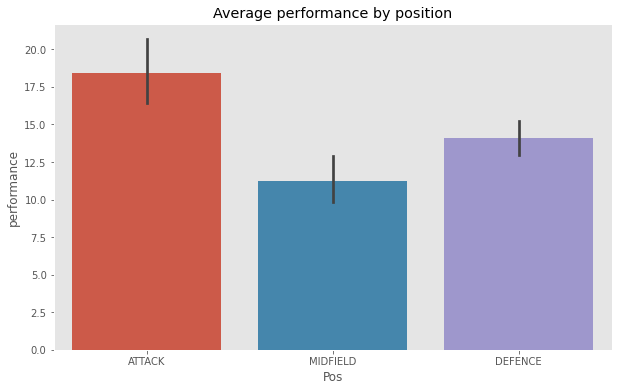

In [45]:
# for each position we will make a an average of performance 
# plot the data using a countplot in x axis we have Pos and in y axis we have average of performance
plt.figure(figsize=(10, 6))
sns.barplot(x="Pos", y="performance", data=data)
# remove grid lines
# remove grid lines
plt.grid(False)
plt.title("Average performance by position")
plt.show()